# Time series clustering exercise

# Data

 year 1993 not found

In [195]:
import pandas as pd
import zipfile 
import os
import geopandas as gpd
import pylab as pl
import time
from IPython.display import display, clear_output
from scipy.cluster.hierarchy import dendrogram, linkage
import sklearn.cluster
from scipy.cluster.vq import whiten
from scipy import cluster

from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans2

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['var']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


!for ((y=94; y<=99; y+=1)); do wget \
https://www2.census.gov/Econ2001_And_Earlier/CBP_CSV//zbp$y\totals.zip; done

!for ((y=0; y<=1; y+=1)); do wget \
https://www2.census.gov/Econ2001_And_Earlier/CBP_CSV//zbp0$y\totals.zip; done

!for ((y=2; y<=9; y+=1)); do wget \
https://www2.census.gov/econ200$y\/CBP_CSV/zbp0$y\totals.zip; done

!for ((y=10; y<=14; y+=1)); do wget \
https://www2.census.gov/econ20$y\/CBP_CSV/zbp$y\totals.zip; done

 Download the NYC zipcodes shapefile. One of many ways in which you can get the zipcodes shapefile for NYC
 https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip


! wget 'https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip'

## You can use zipfile module in python to unzip the files
it should be install in your system, but if it is not you can get the code with wget from here
https://github.com/python/cpython/blob/2.7/Lib/zipfile.py
remembering to use the raw link
(or you can use the usual shell commands, and miss the chance to learn something new)

In [ ]:
! wget 'https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip'

In [2]:
os.system("unzip application%2Fzip -d " + os.getenv("PUIDATA"))

256

In [3]:
zipmap = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/ZIP_CODE_040114.shp")


cmd = "mv zbp94totals.zip " + os.getenv("PUIDATA")
os.system(cmd)

cmd = "mv zbp95totals.zip " + os.getenv("PUIDATA")
os.system(cmd)

cmd = "mv zbp96totals.zip " + os.getenv("PUIDATA")
os.system(cmd)

cmd = "mv zbp97totals.zip " + os.getenv("PUIDATA")
os.system(cmd)

cmd = "mv zbp98totals.zip " + os.getenv("PUIDATA")
os.system(cmd)

cmd = "mv zbp99totals.zip " + os.getenv("PUIDATA")
os.system(cmd)

cmd = "mv zbp00totals.zip " + os.getenv("PUIDATA")
os.system(cmd)

cmd = "mv zbp01totals.zip " + os.getenv("PUIDATA")
os.system(cmd)

cmd = "mv zbp02totals.zip " + os.getenv("PUIDATA")
os.system(cmd)

cmd = "mv zbp03totals.zip " + os.getenv("PUIDATA")
os.system(cmd)

cmd = "mv zbp04totals.zip " + os.getenv("PUIDATA")
os.system(cmd)

cmd = "mv zbp05totals.zip " + os.getenv("PUIDATA")
os.system(cmd)

cmd = "mv zbp06totals.zip " + os.getenv("PUIDATA")
os.system(cmd)

cmd = "mv zbp07totals.zip " + os.getenv("PUIDATA")
os.system(cmd)

cmd = "mv zbp08totals.zip " + os.getenv("PUIDATA")
os.system(cmd)

cmd = "mv zbp09totals.zip " + os.getenv("PUIDATA")
os.system(cmd)

cmd = "mv zbp10totals.zip " + os.getenv("PUIDATA")
os.system(cmd)

cmd = "mv zbp11totals.zip " + os.getenv("PUIDATA")
os.system(cmd)

cmd = "mv zbp12totals.zip " + os.getenv("PUIDATA")
os.system(cmd)

cmd = "mv zbp13totals.zip " + os.getenv("PUIDATA")
os.system(cmd)

#moving to PUIdata

#reading as dataframes

zf = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp94totals.zip')
df94 = pd.read_csv(zf.open('zbp94totals.zip'.replace('.zip','.txt')))


zf = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp95totals.zip')
df95 = pd.read_csv(zf.open('zbp95totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp96totals.zip')
df96 = pd.read_csv(zf.open('zbp96totals.zip'.replace('.zip','.txt')))


zf = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp97totals.zip')
df97 = pd.read_csv(zf.open('zbp97totals.zip'.replace('.zip','.txt')))


zf = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp98totals.zip')
df98 = pd.read_csv(zf.open('zbp98totals.zip'.replace('.zip','.txt')))


zf = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp99totals.zip')
df99 = pd.read_csv(zf.open('zbp99totals.zip'.replace('.zip','.txt')))


zf = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp00totals.zip')
df2000 = pd.read_csv(zf.open('zbp00totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp01totals.zip')
df2001 = pd.read_csv(zf.open('zbp01totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp02totals.zip')
df2002 = pd.read_csv(zf.open('zbp02totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp02totals.zip')
df2003 = pd.read_csv(zf.open('zbp02totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp04totals.zip')
df2004 = pd.read_csv(zf.open('zbp04totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp05totals.zip')
df2005 = pd.read_csv(zf.open('zbp05totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp06totals.zip')
df2006 = pd.read_csv(zf.open('zbp06totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp07totals.zip')
df2007 = pd.read_csv(zf.open('zbp07totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp08totals.zip')
df2008 = pd.read_csv(zf.open('zbp08totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp09totals.zip')
df2009 = pd.read_csv(zf.open('zbp09totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp10totals.zip')
df2010 = pd.read_csv(zf.open('zbp10totals.zip'.replace('.zip','.txt')))



zf = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp11totals.zip')
df2011 = pd.read_csv(zf.open('zbp11totals.zip'.replace('.zip','.txt')))


zf = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp12totals.zip')
df2012 = pd.read_csv(zf.open('zbp12totals.zip'.replace('.zip','.txt')))

zf = zipfile.ZipFile(os.getenv("PUIDATA") + '/zbp13totals.zip')
df2013 = pd.read_csv(zf.open('zbp13totals.zip'.replace('.zip','.txt')))


In [ ]:
'''changed attempt when system became overloaded'''

In [ ]:
os.system("unzip 'zbp94totals.zip' -d " + os.getenv("PUIDATA"))
os.system("unzip 'zbp95totals.zip' -d " + os.getenv("PUIDATA"))
os.system("unzip 'zbp96totals.zip' -d " + os.getenv("PUIDATA"))
os.system("unzip 'zbp97totals.zip' -d " + os.getenv("PUIDATA"))
os.system("unzip 'zbp98totals.zip' -d " + os.getenv("PUIDATA"))
os.system("unzip 'zbp99totals.zip' -d " + os.getenv("PUIDATA"))
os.system("unzip 'zbp00totals.zip' -d " + os.getenv("PUIDATA"))
os.system("unzip 'zbp01totals.zip' -d " + os.getenv("PUIDATA"))
os.system("unzip 'zbp02totals.zip' -d " + os.getenv("PUIDATA"))
os.system("unzip 'zbp03totals.zip' -d " + os.getenv("PUIDATA"))
os.system("unzip 'zbp04totals.zip' -d " + os.getenv("PUIDATA"))
os.system("unzip 'zbp05totals.zip' -d " + os.getenv("PUIDATA"))
os.system("unzip 'zbp06totals.zip' -d " + os.getenv("PUIDATA"))
os.system("unzip 'zbp07totals.zip' -d " + os.getenv("PUIDATA"))
os.system("unzip 'zbp08totals.zip' -d " + os.getenv("PUIDATA"))
os.system("unzip 'zbp09totals.zip' -d " + os.getenv("PUIDATA"))
os.system("unzip 'zbp10totals.zip' -d " + os.getenv("PUIDATA"))
os.system("unzip 'zbp11totals.zip' -d " + os.getenv("PUIDATA"))
os.system("unzip 'zbp12totals.zip' -d " + os.getenv("PUIDATA"))
os.system("unzip 'zbp13totals.zip' -d " + os.getenv("PUIDATA"))


In [196]:
df94 = pd.read_csv(os.getenv("PUIDATA") + '/zbp94totals.txt')
df95 = pd.read_csv(os.getenv("PUIDATA") + '/zbp95totals.txt')
df96 = pd.read_csv(os.getenv("PUIDATA") + '/zbp96totals.txt')
df97 = pd.read_csv(os.getenv("PUIDATA") + '/zbp97totals.txt')
df98 = pd.read_csv(os.getenv("PUIDATA") + '/zbp98totals.txt')
df99 = pd.read_csv(os.getenv("PUIDATA") + '/zbp99totals.txt')
df2000 = pd.read_csv(os.getenv("PUIDATA") + '/zbp00totals.txt')
df2001 = pd.read_csv(os.getenv("PUIDATA") + '/zbp01totals.txt')
df2002 = pd.read_csv(os.getenv("PUIDATA") + '/zbp02totals.txt')
df2003 = pd.read_csv(os.getenv("PUIDATA") + '/zbp03totals.txt')
df2004 = pd.read_csv(os.getenv("PUIDATA") + '/zbp04totals.txt')
df2005 = pd.read_csv(os.getenv("PUIDATA") + '/zbp05totals.txt')
df2006 = pd.read_csv(os.getenv("PUIDATA") + '/zbp06totals.txt')
df2007 = pd.read_csv(os.getenv("PUIDATA") + '/zbp07totals.txt')
df2008 = pd.read_csv(os.getenv("PUIDATA") + '/zbp08totals.txt')
df2009 = pd.read_csv(os.getenv("PUIDATA") + '/zbp09totals.txt')
df2010 = pd.read_csv(os.getenv("PUIDATA") + '/zbp10totals.txt')
df2011 = pd.read_csv(os.getenv("PUIDATA") + '/zbp11totals.txt')
df2012 = pd.read_csv(os.getenv("PUIDATA") + '/zbp12totals.txt')
df2013 = pd.read_csv(os.getenv("PUIDATA") + '/zbp13totals.txt')


In [197]:
df2013.head()

,zip,name,empflag,emp_nf,emp,qp1_nf,qp1,ap_nf,ap,est,city,stabbr,cty_name
0,501,"HOLTSVILLE, NY",A,D,0,D,0,D,0,2,HOLTSVILLE,NY,SUFFOLK
1,1001,"AGAWAM, MA",NaN,G,9418,G,92083,G,373116,439,AGAWAM,MA,HAMPDEN
2,1002,"AMHERST, MA",NaN,H,17263,G,95047,G,398992,572,AMHERST,MA,HAMPSHIRE
3,1003,"AMHERST, MA",NaN,G,184,H,1754,H,7181,15,AMHERST,MA,HAMPSHIRE
4,1004,"AMHERST, MA",NaN,H,179,H,1168,H,5019,16,AMHERST,MA,HAMPSHIRE


lst = [df94, df95, df96, df97, df98, df99, df2001, df2002, df2003, df2004, df2005, df2006, df2007, df2008, df2009, df2010, df2011, df2012, df2013]


In [198]:
print df94.columns
print df95.columns
print df96.columns
print df97.columns
print '98'
print df98.columns
print df99.columns
print df2000.columns
print df2001.columns
print df2002.columns
print '2003'
print df2003.columns
print df2004.columns
print df2005.columns
print df2006.columns
print df2007.columns
print df2008.columns
print df2009.columns
print df2010.columns
print df2011.columns
print df2012.columns
print df2013.columns
#looking at column names in order to standardize

Index([u'zip', u'name', u'empflag', u'emp', u'qp1', u'ap', u'est'], dtype='object')
Index([u'zip', u'name', u'empflag', u'emp', u'qp1', u'ap', u'est'], dtype='object')
Index([u'zip', u'name', u'empflag', u'emp', u'qp1', u'ap', u'est'], dtype='object')
Index([u'zip', u'name', u'empflag', u'emp', u'qp1', u'ap', u'est'], dtype='object')
98
Index([u'ZIP', u'NAME', u'EMPFLAG', u'EMP', u'QP1', u'AP', u'EST'], dtype='object')
Index([u'ZIP', u'NAME', u'EMPFLAG', u'EMP', u'QP1', u'AP', u'EST'], dtype='object')
Index([u'ZIP', u'NAME', u'EMPFLAG', u'EMP', u'QP1', u'AP', u'EST'], dtype='object')
Index([u'ZIP', u'NAME', u'EMPFLAG', u'EMP', u'QP1', u'AP', u'EST'], dtype='object')
Index([u'ZIP', u'NAME', u'EMPFLAG', u'EMP', u'QP1', u'AP', u'EST'], dtype='object')
2003
Index([u'zip', u'name', u'empflag', u'emp', u'qp1', u'ap', u'est'], dtype='object')
Index([u'zip', u'name', u'empflag', u'emp', u'qp1', u'ap', u'est'], dtype='object')
Index([u'zip', u'name', u'empflag', u'emp', u'qp1', u'ap', u'est'], 

In [199]:
#sam overshine
lst = [df94, df95, df96, df97, df2003, df2004, df2005, df2006, df2007, df2008, df2009, df2010, df2011, df2012, df2013] 
for i in lst:
    i['ZIPCODE']=i['zip']
    


In [200]:
lst2 = [df98, df99, df2000, df2001, df2002]
for i in lst2:
    i['ZIPCODE']=i['ZIP']

In [201]:
lst3 = [df94, df95, df96, df97, df2003, df2004, df2005, df2006, df2007, df2008, df2009, df2010, df2011, df2012, df2013] 
for i in lst3:
    i['establishments']=i['est']

In [202]:
lst4 = [df98, df99, df2000, df2001, df2002]
for i in lst4:
    i['establishments']=i['EST']

In [203]:
lst5 = [df94, df95, df96, df97, df98, df99, df2000, df2001, df2002, df2003, df2004, df2005, df2006, df2007, df2008, df2009, df2010, df2011, df2012, df2013]
for df in lst5:
    df = df.filter(items=['ZIPCODE', 'establishments'], axis = 1)
    
'''why doesnt this work???'''

'why doesnt this work???'

In [204]:
df94 = df94.filter(items=['ZIPCODE', 'establishments'], axis = 1)
df95 = df95.filter(items=['ZIPCODE', 'establishments'], axis = 1)
df96 = df96.filter(items=['ZIPCODE', 'establishments'], axis = 1)
df97 = df97.filter(items=['ZIPCODE', 'establishments'], axis = 1)
df98 = df98.filter(items=['ZIPCODE', 'establishments'], axis = 1)
df99 = df99.filter(items=['ZIPCODE', 'establishments'], axis = 1)


df2000 = df2000.filter(items=['ZIPCODE', 'establishments'], axis = 1)
df2001 = df2001.filter(items=['ZIPCODE', 'establishments'], axis = 1)
df2002 = df2002.filter(items=['ZIPCODE', 'establishments'], axis = 1)
df2003 = df2003.filter(items=['ZIPCODE', 'establishments'], axis = 1)
df2004 = df2004.filter(items=['ZIPCODE', 'establishments'], axis = 1)
df2005 = df2005.filter(items=['ZIPCODE', 'establishments'], axis = 1)
df2006 = df2006.filter(items=['ZIPCODE', 'establishments'], axis = 1)
df2007 = df2007.filter(items=['ZIPCODE', 'establishments'], axis = 1)
df2008 = df2008.filter(items=['ZIPCODE', 'establishments'], axis = 1)
df2009 = df2009.filter(items=['ZIPCODE', 'establishments'], axis = 1)
df2010 = df2010.filter(items=['ZIPCODE', 'establishments'], axis = 1)
df2011 = df2010.filter(items=['ZIPCODE', 'establishments'], axis = 1)
df2012 = df2012.filter(items=['ZIPCODE', 'establishments'], axis = 1)
df2013 = df2013.filter(items=['ZIPCODE', 'establishments'], axis = 1)

In [205]:
df94['year'] = '1994'
df95['year'] = '1995'
df96['year'] = '1996'
df97['year'] = '1997'
df98['year'] = '1998'
df99['year'] = '1999'
df2000['year'] = '2000'
df2001['year'] = '2001'
df2002['year'] = '2002'
df2003['year'] = '2003'
df2004['year'] = '2004'
df2005['year'] = '2005'
df2006['year'] = '2006'
df2007['year'] = '2007'
df2008['year'] = '2008'
df2009['year'] = '2009'
df2010['year'] = '2010'
df2011['year'] = '2011'
df2012['year'] = '2012'
df2013['year'] = '2013'


In [206]:
allyears = pd.concat([df94, df95, df96, df97, df98, df99, df2001, df2002, df2003, df2004, df2005, df2006, df2007, df2008, df2009, df2010, df2011, df2012, df2013], ignore_index=True)

In [207]:
allyears.head()

,ZIPCODE,establishments,year
0,1001,439,1994
1,1002,450,1994
2,1003,10,1994
3,1004,47,1994
4,1005,92,1994


In [208]:
allyears['ZIPCODE'] = allyears[['ZIPCODE']].astype(str)

In [209]:
allyears.dtypes

ZIPCODE           object
establishments     int64
year              object
dtype: object

In [210]:
NYCZIPS = zipmap.ZIPCODE.unique()

In [237]:
zipmap.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [211]:
type(NYCZIPS)

numpy.ndarray

In [212]:
allyearsNYC = allyears[allyears['ZIPCODE'].isin(NYCZIPS)]

In [213]:
yearlist = allyearsNYC.year.unique() 

In [214]:
allyearsNYCp = allyearsNYC.pivot(index='ZIPCODE', columns='year', values='establishments')

In [215]:
allyearsNYCp.head()

year,1994,1995,1996,1997,1998,1999,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
ZIPCODE,,,,,,,,,,,,,,,,,,,
10001,6999.0,7088.0,7075.0,7154.0,7254.0,7233.0,7188.0,7141.0,7084.0,7370.0,7312.0,7415.0,7549.0,7472.0,7305.0,7241.0,7241.0,7235.0,7273.0
10002,1784.0,1819.0,1919.0,2049.0,2003.0,2085.0,2543.0,2269.0,2402.0,2551.0,2682.0,2686.0,2685.0,2691.0,2775.0,2872.0,2872.0,2954.0,2988.0
10003,3256.0,3377.0,3417.0,3535.0,3649.0,3659.0,3602.0,3616.0,3704.0,3776.0,3867.0,3909.0,4049.0,4071.0,4099.0,4113.0,4113.0,4214.0,4277.0
10004,1115.0,1124.0,1133.0,1173.0,1176.0,1233.0,1247.0,1253.0,1252.0,1283.0,1260.0,1311.0,1370.0,1376.0,1379.0,1398.0,1398.0,1442.0,1479.0
10005,1076.0,1109.0,1216.0,1227.0,1270.0,1242.0,1249.0,1244.0,1200.0,1226.0,1214.0,1259.0,1273.0,1291.0,1274.0,1266.0,1266.0,1273.0,1296.0


In [216]:
allyearsNYCp.shape

(245, 19)

In [239]:
MapM.head()

,ZIPCODE,establishments,geometry,year
0,10001,6999,"POLYGON ((981958.6472873986 213464.4530421346,...",1994
1,10001,7088,"POLYGON ((981958.6472873986 213464.4530421346,...",1995
2,10001,7075,"POLYGON ((981958.6472873986 213464.4530421346,...",1996
3,10001,7154,"POLYGON ((981958.6472873986 213464.4530421346,...",1997
4,10001,7254,"POLYGON ((981958.6472873986 213464.4530421346,...",1998


In [240]:
MapM= MapM.filter(items=['ZIPCODE', 'establishments', 'geometry', 'year'], axis = 1)

In [241]:
MapM.head()

,ZIPCODE,establishments,geometry,year
0,10001,6999,"POLYGON ((981958.6472873986 213464.4530421346,...",1994
1,10001,7088,"POLYGON ((981958.6472873986 213464.4530421346,...",1995
2,10001,7075,"POLYGON ((981958.6472873986 213464.4530421346,...",1996
3,10001,7154,"POLYGON ((981958.6472873986 213464.4530421346,...",1997
4,10001,7254,"POLYGON ((981958.6472873986 213464.4530421346,...",1998


In [221]:
MapP = pd.pivot_table(MapM, index='ZIPCODE')

In [242]:
MapP.head()

,establishments
ZIPCODE,
10001,7243.631579
10002,2454.157895
10003,3805.421053
10004,1284.315789
10005,1235.315789


In [188]:
#allyearsNYCp.reset_index(level=0, inplace=True)

In [223]:
allyearsNYCp.head()

year,1994,1995,1996,1997,1998,1999,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
ZIPCODE,,,,,,,,,,,,,,,,,,,
10001,6999.0,7088.0,7075.0,7154.0,7254.0,7233.0,7188.0,7141.0,7084.0,7370.0,7312.0,7415.0,7549.0,7472.0,7305.0,7241.0,7241.0,7235.0,7273.0
10002,1784.0,1819.0,1919.0,2049.0,2003.0,2085.0,2543.0,2269.0,2402.0,2551.0,2682.0,2686.0,2685.0,2691.0,2775.0,2872.0,2872.0,2954.0,2988.0
10003,3256.0,3377.0,3417.0,3535.0,3649.0,3659.0,3602.0,3616.0,3704.0,3776.0,3867.0,3909.0,4049.0,4071.0,4099.0,4113.0,4113.0,4214.0,4277.0
10004,1115.0,1124.0,1133.0,1173.0,1176.0,1233.0,1247.0,1253.0,1252.0,1283.0,1260.0,1311.0,1370.0,1376.0,1379.0,1398.0,1398.0,1442.0,1479.0
10005,1076.0,1109.0,1216.0,1227.0,1270.0,1242.0,1249.0,1244.0,1200.0,1226.0,1214.0,1259.0,1273.0,1291.0,1274.0,1266.0,1266.0,1273.0,1296.0


In [224]:
clean = allyearsNYCp.dropna()
#some zips dropped after cleaning

In [225]:
zipcodeslist = clean.index.values

In [226]:
matrix = clean.values

In [227]:
matrix

array([[ 6999.,  7088.,  7075., ...,  7241.,  7235.,  7273.],
       [ 1784.,  1819.,  1919., ...,  2872.,  2954.,  2988.],
       [ 3256.,  3377.,  3417., ...,  4113.,  4214.,  4277.],
       ..., 
       [   95.,    90.,    88., ...,   132.,   129.,   127.],
       [  294.,   285.,   287., ...,   330.,   326.,   327.],
       [   33.,    32.,    34., ...,    48.,    49.,    40.]])

In [228]:
matrix = np.array(matrix)

In [229]:
#whitening matrix
matrixwhite = whiten(matrix)

In [230]:
matrixwhite

array([[ 6.00639042,  5.93729175,  5.91310155, ...,  5.93223215,
         5.84794626,  5.82431412],
       [ 1.53099021,  1.52369268,  1.60385044, ...,  2.35290302,
         2.38767564,  2.39282972],
       [ 2.79422878,  2.82875765,  2.85584   , ...,  3.36959962,
         3.40611549,  3.42507789],
       ..., 
       [ 0.08152695,  0.07538886,  0.07354812, ...,  0.10814178,
         0.10426884,  0.10170327],
       [ 0.25230444,  0.2387314 ,  0.23986716, ...,  0.27035446,
         0.2635011 ,  0.2618659 ],
       [ 0.02831989,  0.02680493,  0.02841632, ...,  0.03932428,
         0.03960599,  0.03203253]])

In [231]:
lob = KMeans(n_clusters = 4)
model = lob.fit(matrixwhite)

In [232]:
labels = model.labels_

In [233]:
zipcodeslist

array(['10001', '10002', '10003', '10004', '10005', '10006', '10007',
       '10009', '10010', '10011', '10012', '10013', '10014', '10016',
       '10017', '10018', '10019', '10020', '10021', '10022', '10023',
       '10024', '10025', '10026', '10027', '10028', '10029', '10030',
       '10031', '10032', '10033', '10034', '10035', '10036', '10037',
       '10038', '10039', '10040', '10041', '10043', '10044', '10055',
       '10080', '10081', '10103', '10104', '10105', '10106', '10107',
       '10110', '10111', '10112', '10115', '10118', '10119', '10120',
       '10121', '10122', '10123', '10128', '10151', '10152', '10153',
       '10154', '10155', '10158', '10162', '10165', '10166', '10167',
       '10168', '10169', '10170', '10171', '10172', '10173', '10174',
       '10175', '10176', '10177', '10178', '10270', '10271', '10278',
       '10279', '10280', '10281', '10282', '10285', '10286', '10301',
       '10302', '10303', '10304', '10305', '10306', '10307', '10308',
       '10309', '103

In [234]:
#christian
labledmodel = pd.DataFrame({"ZIPCODE": zipcodeslist, "label": labels})

In [235]:
labledmodel.head()

,ZIPCODE,label
0,10001,1
1,10002,3
2,10003,3
3,10004,0
4,10005,0


In [96]:
zipmap.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [97]:
MapLabeled = pd.merge(labledmodel, zipmap, on='ZIPCODE')

In [98]:
MapLabeled.head()

,ZIPCODE,label,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,10001,1,0,New York,22413.0,1.779494e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((981958.6472873986 213464.4530421346,..."
1,10002,3,0,New York,81305.0,2.628013e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((991339.8703228086 207576.7837151289,..."
2,10003,3,0,New York,55878.0,1.553838e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((989830.469142139 207048.1263078749, ..."
3,10004,0,0,New York,2187.0,4.002521e+06,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((981197.408652395 196571.0816452205, ..."
4,10004,0,0,New York,2187.0,1.202708e+06,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((972696.8446168154 193014.5477478057,..."


In [99]:
MapLabeled =  MapLabeled.filter(items=['ZIPCODE', 'label', 'geometry'], axis = 1)

In [100]:
MapLabeled.head()

,ZIPCODE,label,geometry
0,10001,1,"POLYGON ((981958.6472873986 213464.4530421346,..."
1,10002,3,"POLYGON ((991339.8703228086 207576.7837151289,..."
2,10003,3,"POLYGON ((989830.469142139 207048.1263078749, ..."
3,10004,0,"POLYGON ((981197.408652395 196571.0816452205, ..."
4,10004,0,"POLYGON ((972696.8446168154 193014.5477478057,..."


In [101]:
MapLabeled = gpd.GeoDataFrame(MapLabeled)

In [103]:
import choroplethNYC as cp


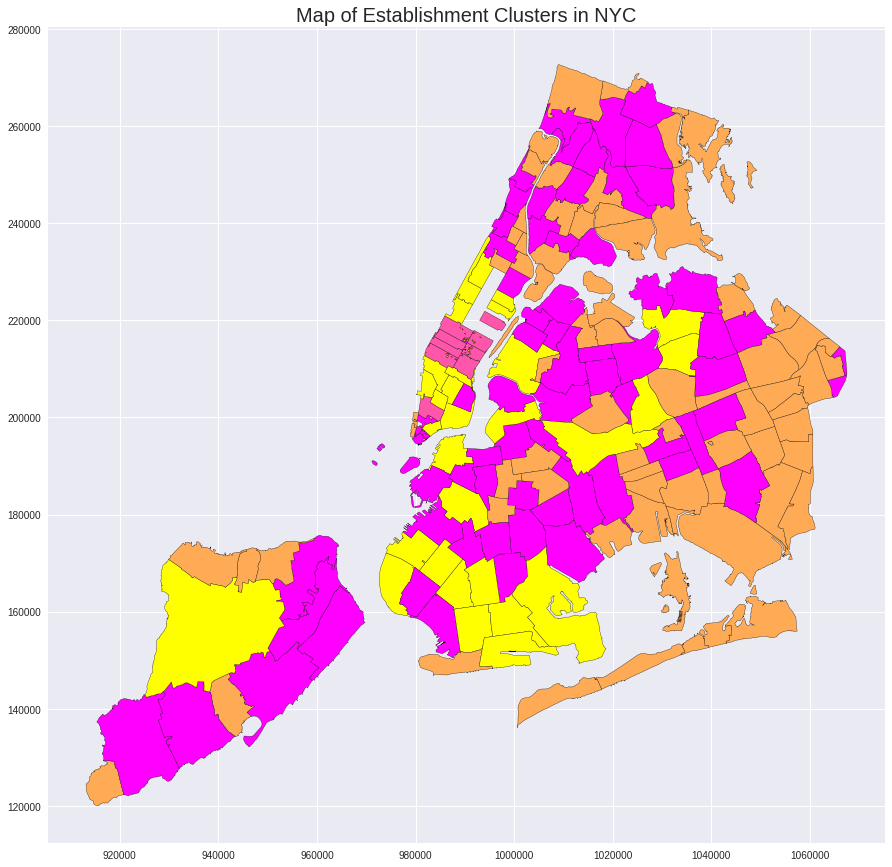

In [307]:
#choropleth of clusters
clusters =[0,1,2,3]
plt.style.use('seaborn')
fig, ax = plt.subplots(1, figsize=(15,15))
MapLabeled.plot(ax=ax, scheme='fisher_jenks', k=4, column="label", cmap='spring', edgecolor="black")
#plt.legend(handles=[clusters])
ax.legend()
ax.set_title("Map of Establishment Clusters in NYC", fontsize=20)

cloropleth of cluster centers for 4 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster.

there are clear geographical distributions to the clustering of number of establishments. Orange areas are mainly seen in outer Queens, upper Manhattan, the far Rockaways and the Bronx. There is one shade of pink that is only seen in midtown manhattan and I guess this would signify highest number of establishments

In [108]:
MapLabeled.head()

,ZIPCODE,label,geometry
0,10001,1,"POLYGON ((981958.6472873986 213464.4530421346,..."
1,10002,3,"POLYGON ((991339.8703228086 207576.7837151289,..."
2,10003,3,"POLYGON ((989830.469142139 207048.1263078749, ..."
3,10004,0,"POLYGON ((981197.408652395 196571.0816452205, ..."
4,10004,0,"POLYGON ((972696.8446168154 193014.5477478057,..."


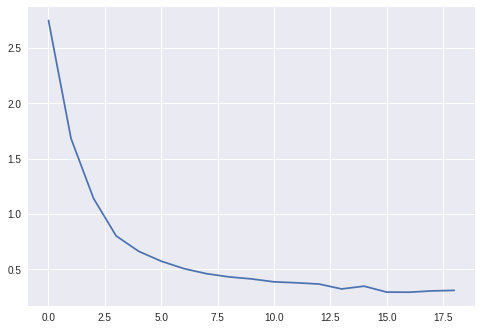

In [131]:
#https://stats.stackexchange.com/questions/9850/how-to-plot-data-output-of-clustering
initial = [cluster.vq.kmeans(matrixwhite,i) for i in range(1,20)]
pyplot.plot([var for (cent,var) in initial])
pyplot.show()

In [ ]:
'''elbow plot'''

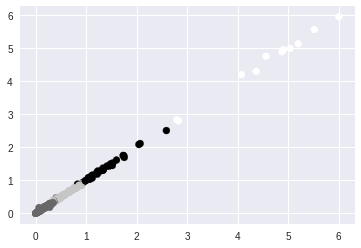

In [134]:
cent, var = initial[3]
#use vq() to get as assignment for each obs.
assignment,cdist = cluster.vq.vq(matrixwhite,cent)
pyplot.scatter(matrixwhite[:,0], matrixwhite[:,1], c=assignment)
pyplot.show()


In [185]:
labledmodel = pd.DataFrame({"ZIPCODE": zipcodeslist, "label": labels})


In [186]:
k0 = labledmodel.loc[labledmodel['label'] == 0]
k1 = labledmodel.loc[labledmodel['label'] == 1]
k2 = labledmodel.loc[labledmodel['label'] == 2]
k3 = labledmodel.loc[labledmodel['label'] == 3]

In [187]:
k0 = k0.reset_index(drop=True)
k1 = k1.reset_index(drop=True)
k2 = k2.reset_index(drop=True)
k3 = k3.reset_index(drop=True)

In [279]:
k0.shape

(72, 2)

In [188]:
kall = labledmodel

In [272]:
xticks = ['10001', '10002', '10003', '10004', '10005', '10006', '10007','10009', '10010', '10011', '10012', '10013', '10014', '10016',
       '10017', '10018', '10019', '10020', '10021', '10022', '10023',
       '10024', '10025', '10026', '10027', '10028', '10029', '10030',
       '10031', '10032', '10033', '10034', '10035', '10036', '10037',
       '10038', '10039', '10040', '10041', '10043', '10044', '10055',
       '10080', '10081', '10103', '10104', '10105', '10106', '10107',
       '10110', '10111', '10112', '10115', '10118', '10119', '10120',
       '10121', '10122', '10123', '10128', '10151', '10152', '10153',
       '10154', '10155', '10158', '10162', '10165', '10166', '10167',
       '10168', '10169', '10170', '10171', '10172', '10173', '10174',
       '10175', '10176', '10177', '10178', '10270', '10271', '10278',
       '10279', '10280', '10281', '10282', '10285', '10286', '10301',
       '10302', '10303', '10304', '10305', '10306', '10307', '10308',
       '10309', '10310', '10312', '10314', '10451', '10452', '10453',
       '10454', '10455', '10456', '10457', '10458', '10459', '10460',
       '10461', '10462', '10463', '10464', '10465', '10466', '10467',
       '10468', '10469', '10470', '10471', '10472', '10473', '10474',
       '10475', '11001', '11004', '11005', '11040', '11096', '11101',
       '11102', '11103', '11104', '11105', '11106', '11201', '11203',
       '11204', '11205', '11206', '11207', '11208', '11209', '11210',
       '11211', '11212', '11213', '11214', '11215', '11216', '11217',
       '11218', '11219', '11220', '11221', '11222', '11223', '11224',
       '11225', '11226', '11228', '11229', '11230', '11231', '11232',
       '11233', '11234', '11235', '11236', '11237', '11238', '11239',
       '11354', '11355', '11356', '11357', '11358', '11359', '11360',
       '11361', '11362', '11363', '11364', '11365', '11366', '11367',
       '11368', '11369', '11370', '11371', '11372', '11373', '11374',
       '11375', '11377', '11378', '11379', '11385', '11411', '11412',
       '11413', '11414', '11415', '11416', '11417', '11418', '11419',
       '11420', '11421', '11422', '11423', '11426', '11427', '11428',
       '11429', '11430', '11432', '11433', '11434', '11435', '11436',
       '11451', '11691', '11692', '11693', '11694', '11697']

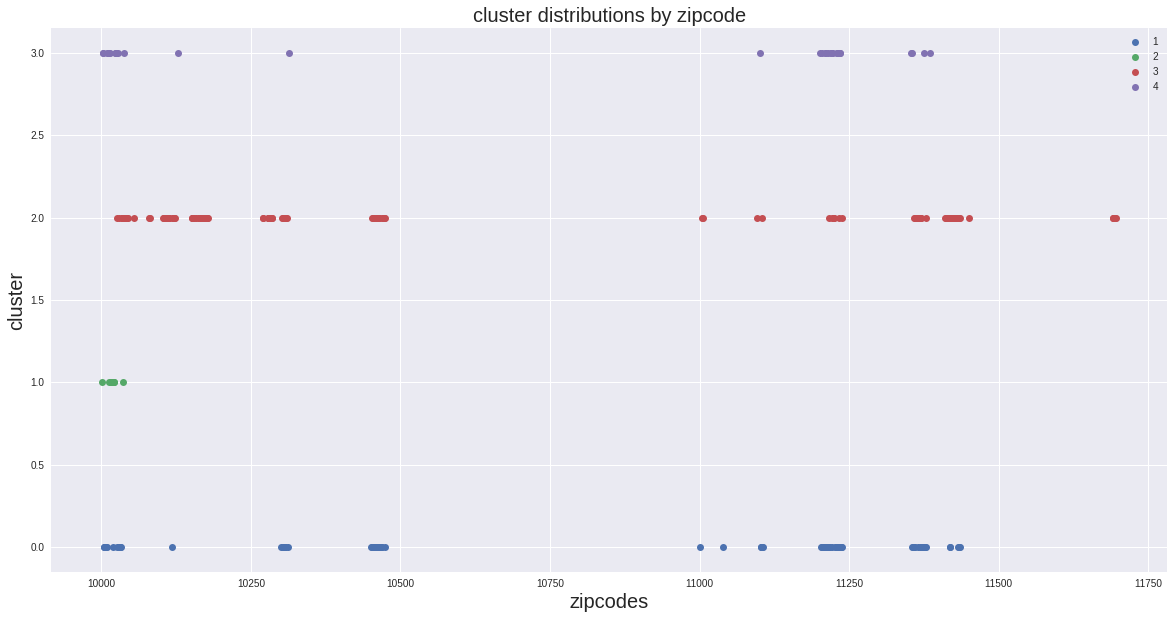

In [298]:
pl.figure(figsize=(20,10))

pl.plot(k0["ZIPCODE"], k0["label"], 'o', label='1')
pl.plot(k1["ZIPCODE"], k1["label"], 'o', label='2')
pl.plot(k2["ZIPCODE"], k2["label"], 'o', label='3')
pl.plot(k3["ZIPCODE"], k3["label"], 'o', label='4')
pl.title('cluster distributions by zipcode', fontsize=20)
#pl.xticks(arange(1), xticks)
pl.xlabel('zipcodes',  fontsize=20)
pl.ylabel('cluster' , fontsize=20)
#pl.xticks(range(0,72), xticks)
#pl.figsize(20,10)
pl.legend()


this shows the fewest observations in cluster two, mainly congregating around similiar numbered zipcodes. That could be the midtown pink on the map

In [243]:
columnsTitles = [df94, df95, df96, df97, df2003, df2004, df2005, df2006, df2007, df2008, df2009, df2010, df2011, df2012, df2013]

In [138]:
matrixwhite

array([ 1.53099021,  1.52369268,  1.60385044,  1.67693693,  1.62467608,
        1.69343965,  2.0208223 ,  1.86040611,  1.96947105,  2.03386334,
        2.1507567 ,  2.14083657,  2.16674992,  2.1776472 ,  2.2757931 ,
        2.35290302,  2.35290302,  2.38767564,  2.39282972])

In [248]:
zipmap.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [250]:
zipmap = zipmap[['ZIPCODE', 'geometry']]

In [254]:
type(clean)

pandas.core.frame.DataFrame

In [265]:
clean.head()

year,1994,1995,1996,1997,1998,1999,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,ZIPCODE
ZIPCODE,,,,,,,,,,,,,,,,,,,,
10001,6999.0,7088.0,7075.0,7154.0,7254.0,7233.0,7188.0,7141.0,7084.0,7370.0,7312.0,7415.0,7549.0,7472.0,7305.0,7241.0,7241.0,7235.0,7273.0,10001
10002,1784.0,1819.0,1919.0,2049.0,2003.0,2085.0,2543.0,2269.0,2402.0,2551.0,2682.0,2686.0,2685.0,2691.0,2775.0,2872.0,2872.0,2954.0,2988.0,10002
10003,3256.0,3377.0,3417.0,3535.0,3649.0,3659.0,3602.0,3616.0,3704.0,3776.0,3867.0,3909.0,4049.0,4071.0,4099.0,4113.0,4113.0,4214.0,4277.0,10003
10004,1115.0,1124.0,1133.0,1173.0,1176.0,1233.0,1247.0,1253.0,1252.0,1283.0,1260.0,1311.0,1370.0,1376.0,1379.0,1398.0,1398.0,1442.0,1479.0,10004
10005,1076.0,1109.0,1216.0,1227.0,1270.0,1242.0,1249.0,1244.0,1200.0,1226.0,1214.0,1259.0,1273.0,1291.0,1274.0,1266.0,1266.0,1273.0,1296.0,10005


In [262]:
clean['ZIPCODE'] = clean.index

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [263]:
clean.head()

year,1994,1995,1996,1997,1998,1999,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,ZIPCODE
ZIPCODE,,,,,,,,,,,,,,,,,,,,
10001,6999.0,7088.0,7075.0,7154.0,7254.0,7233.0,7188.0,7141.0,7084.0,7370.0,7312.0,7415.0,7549.0,7472.0,7305.0,7241.0,7241.0,7235.0,7273.0,10001
10002,1784.0,1819.0,1919.0,2049.0,2003.0,2085.0,2543.0,2269.0,2402.0,2551.0,2682.0,2686.0,2685.0,2691.0,2775.0,2872.0,2872.0,2954.0,2988.0,10002
10003,3256.0,3377.0,3417.0,3535.0,3649.0,3659.0,3602.0,3616.0,3704.0,3776.0,3867.0,3909.0,4049.0,4071.0,4099.0,4113.0,4113.0,4214.0,4277.0,10003
10004,1115.0,1124.0,1133.0,1173.0,1176.0,1233.0,1247.0,1253.0,1252.0,1283.0,1260.0,1311.0,1370.0,1376.0,1379.0,1398.0,1398.0,1442.0,1479.0,10004
10005,1076.0,1109.0,1216.0,1227.0,1270.0,1242.0,1249.0,1244.0,1200.0,1226.0,1214.0,1259.0,1273.0,1291.0,1274.0,1266.0,1266.0,1273.0,1296.0,10005


In [256]:
#Baiyue
zipmapdf = pd.DataFrame(zipmap)

In [257]:
type(zipmapdf)

pandas.core.frame.DataFrame

In [266]:
zipmapdf.head()

,ZIPCODE,geometry
0,11436,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [267]:
geoM = zipmapdf.merge(clean, how = 'inner')

In [268]:
geoM

,ZIPCODE,geometry,1994,1995,1996,1997,1998,1999,2001,2002,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,11436,"POLYGON ((1038098.251871482 188138.3800067157,...",51.0,50.0,53.0,51.0,51.0,58.0,57.0,78.0,...,84.0,82.0,80.0,84.0,90.0,92.0,98.0,98.0,95.0,99.0
1,11213,"POLYGON ((1001613.712964058 186926.4395172149,...",406.0,420.0,433.0,456.0,476.0,473.0,493.0,546.0,...,570.0,556.0,565.0,556.0,592.0,621.0,675.0,675.0,726.0,755.0
2,11212,"POLYGON ((1011174.275535807 183696.33770971, 1...",505.0,494.0,502.0,527.0,519.0,541.0,527.0,577.0,...,586.0,587.0,570.0,587.0,602.0,647.0,699.0,699.0,721.0,731.0
3,11225,"POLYGON ((995908.3654508889 183617.6128015518,...",381.0,387.0,388.0,410.0,416.0,409.0,422.0,479.0,...,492.0,491.0,499.0,514.0,520.0,543.0,580.0,580.0,623.0,673.0
4,11218,"POLYGON ((991997.1134308875 176307.4958601296,...",985.0,1015.0,1049.0,1075.0,1118.0,1149.0,1180.0,1228.0,...,1295.0,1332.0,1331.0,1377.0,1397.0,1457.0,1474.0,1474.0,1605.0,1687.0
5,11226,"POLYGON ((994821.4729396403 177865.7178093046,...",879.0,882.0,885.0,904.0,942.0,923.0,884.0,967.0,...,1044.0,1049.0,1015.0,1049.0,1083.0,1097.0,1127.0,1127.0,1229.0,1256.0
6,11219,"POLYGON ((987286.3515269756 173946.4621963799,...",1650.0,1708.0,1768.0,1863.0,1928.0,1997.0,2153.0,2172.0,...,2286.0,2343.0,2351.0,2391.0,2396.0,2487.0,2581.0,2581.0,2696.0,2777.0
7,11210,"POLYGON ((995796.0097044706 171110.0666224658,...",763.0,783.0,779.0,806.0,815.0,776.0,816.0,839.0,...,842.0,875.0,893.0,887.0,906.0,919.0,990.0,990.0,1006.0,1003.0
8,11230,"POLYGON ((994099.2959063053 171240.7064530551,...",1411.0,1465.0,1537.0,1563.0,1605.0,1670.0,1807.0,1829.0,...,1925.0,1930.0,1934.0,1934.0,1945.0,1984.0,2026.0,2026.0,1999.0,2095.0
9,11204,"POLYGON ((989500.1699339747 170730.1687602103,...",1287.0,1297.0,1334.0,1374.0,1444.0,1481.0,1686.0,1569.0,...,1733.0,1778.0,1806.0,1858.0,1826.0,1817.0,1902.0,1902.0,2024.0,2108.0


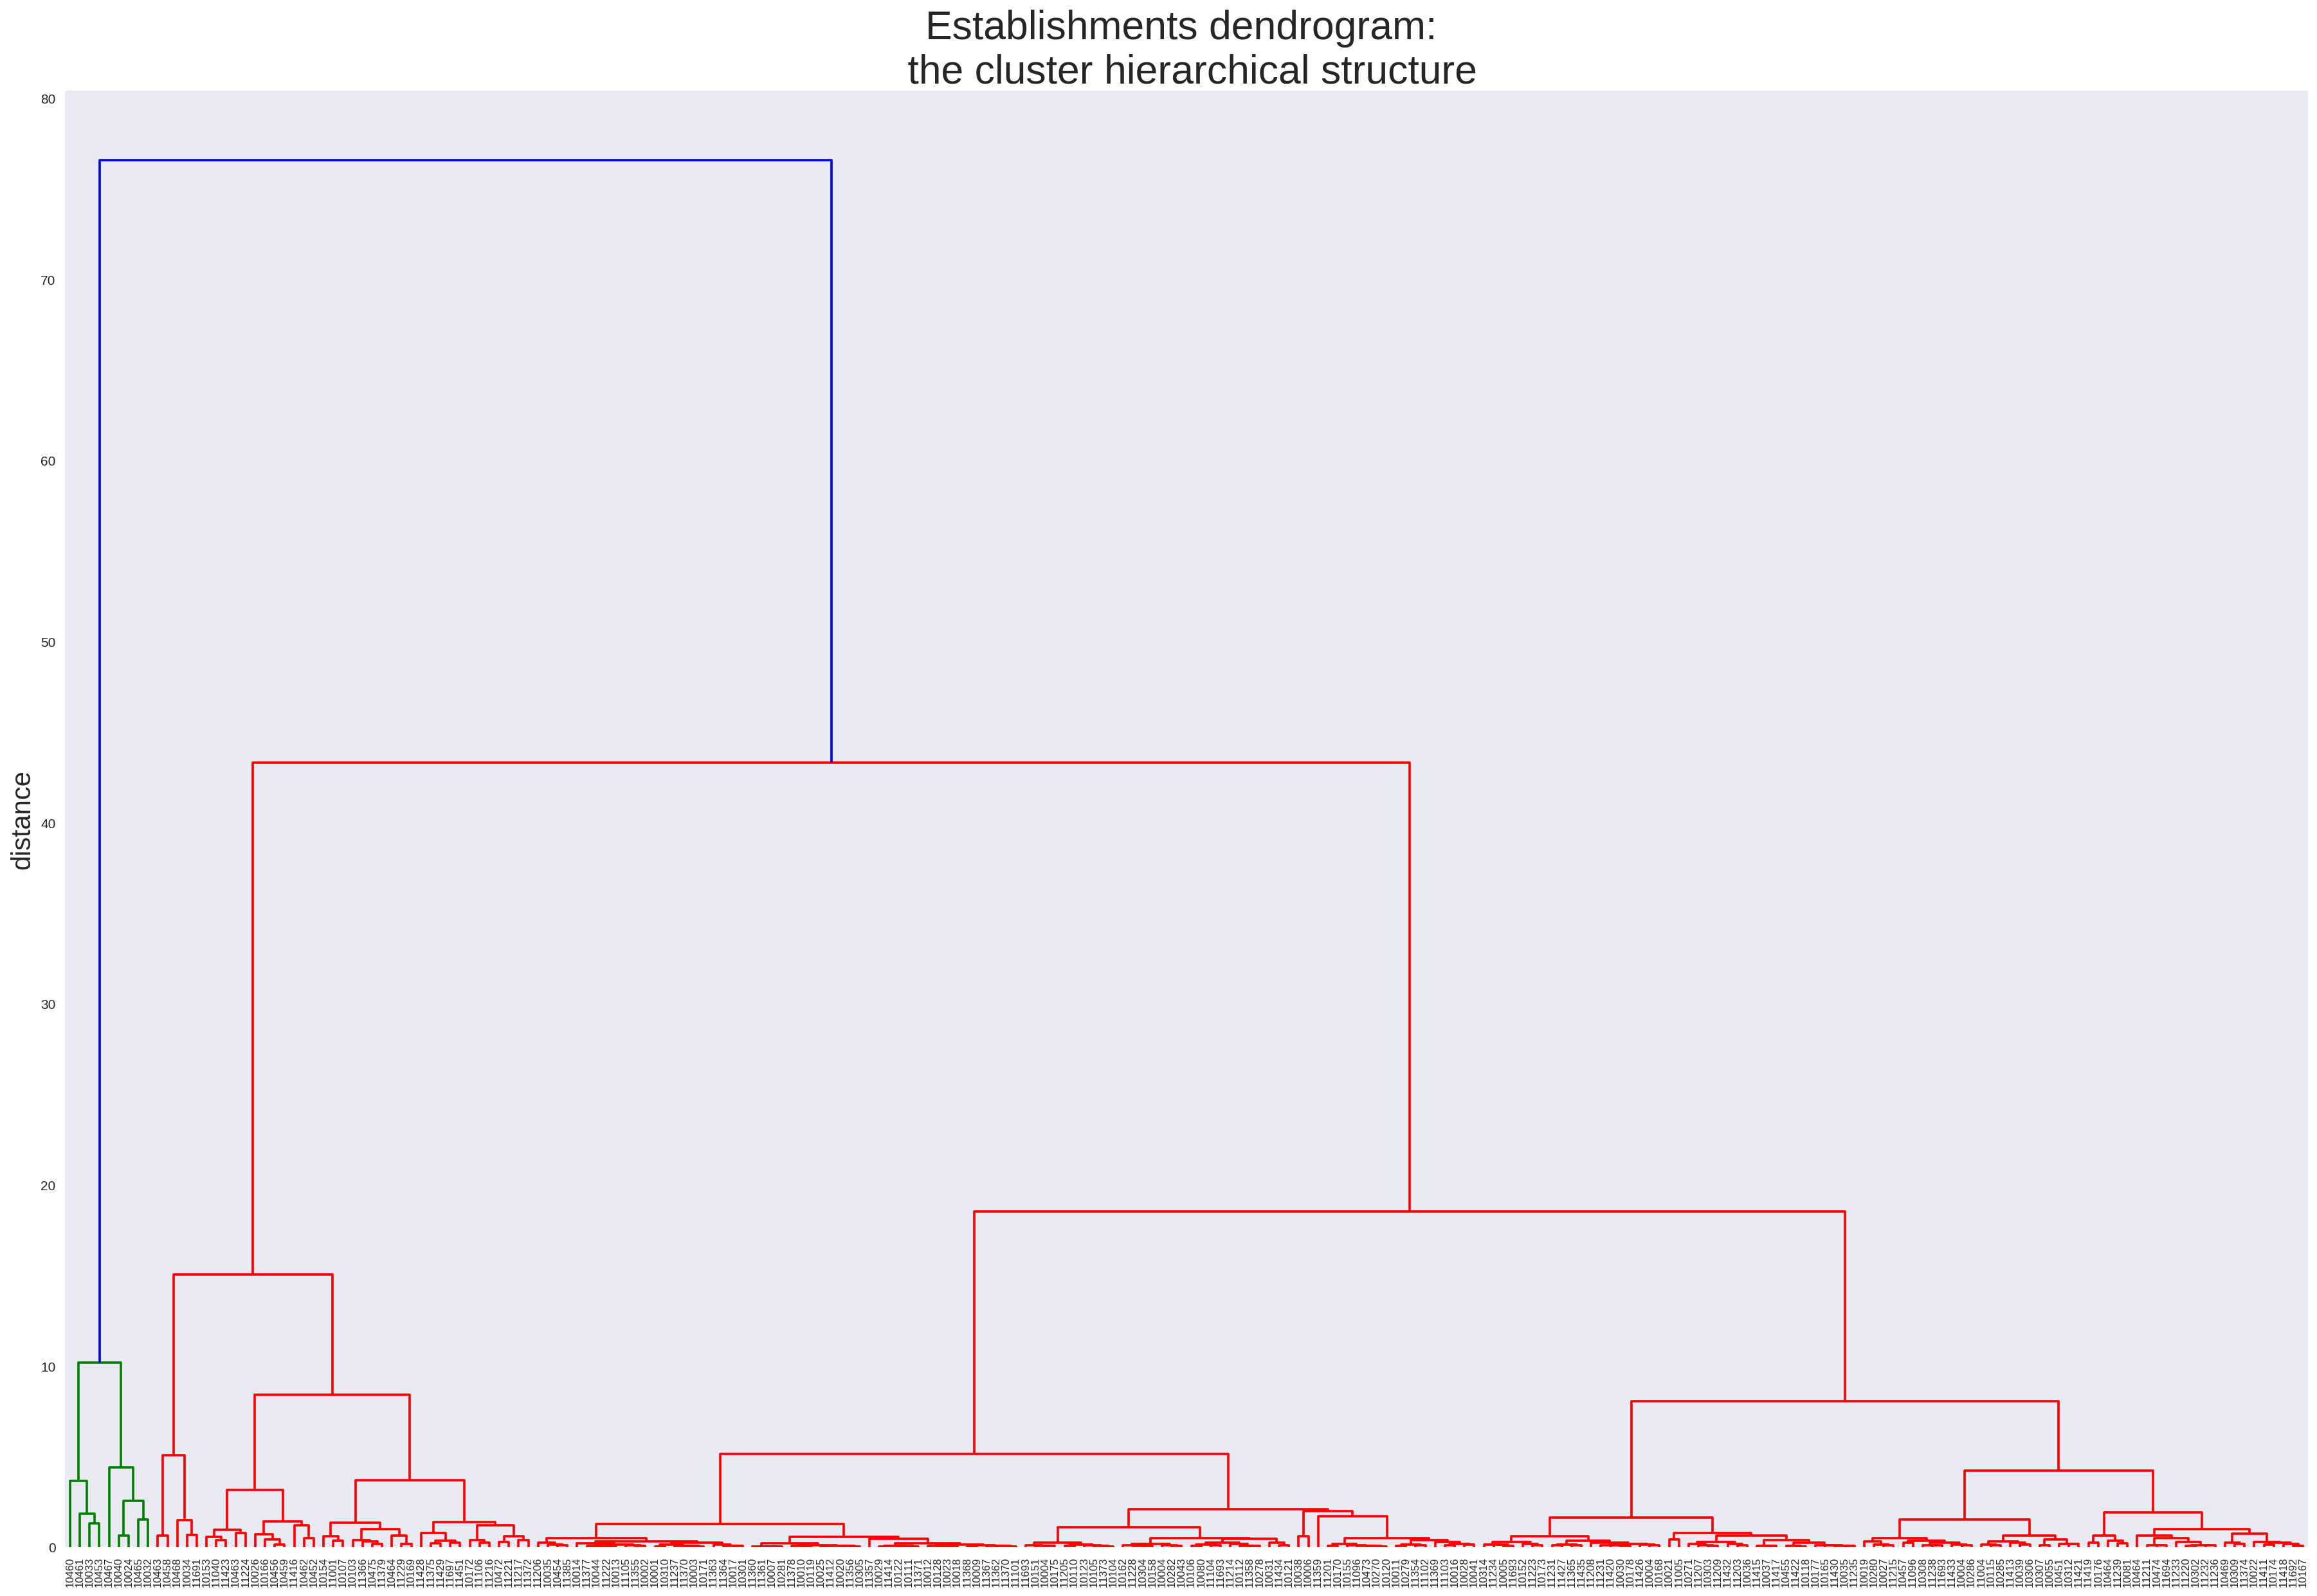

In [308]:
fig = pl.figure(figsize=(30,20), dpi=150)
pl.ylabel("distance", fontsize = 20)
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(matrixwhite, method='ward'),
                               labels = geoM.ZIPCODE.values,
                               leaf_rotation=90.,  # rotates the x axis labels
                               leaf_font_size=8.)  # font size for the x axis labels)
#pl.xticks(rotation=90)
pl.grid('off')
title = pl.title("Establishments dendrogram: \n the cluster hierarchical structure", fontsize=30)
#this is a dendrogram for inspection of the hierarchical structure